## Task 4: Detecting fake notes with Keras
In this task, we are going to train a neural network to distinguish between real and fake bank notes. This notebook contains information about how a general real-life machine learning task will take be divided into set of steps. 
The first step however, is to import the correct libraries.

Below

**numpy** is a numeric processing library, this will help up read data from files an put them into a format that is usable later on 

**keras** is the high level machine learning framework that we want to use to train a model. 

The first step is to import them so we can use them in our project 
(Hint: Press Shift+enter to execute a cell)

In [0]:
import numpy as np
import keras as K # <-- This is all we need to get Keras up and running

Using TensorFlow backend.


## Data Loader 

A small helper function that reads data in the correct format that we expect
It returns the features as **x** and the label as **y**

You do not need to change anything in this code.



In [0]:
# Function that reads the CSV file and loads the data 
# x : contains the features as Nx4 matrix (N is the number of observations)
# y : contains the corresponding label Nx1 vector

def load_data(filename):
  x = np.loadtxt(filename, delimiter=',', usecols=[1,2,3,4], dtype=np.float32, skiprows=1)
  y = np.loadtxt(filename, delimiter=',', usecols=[5], dtype=np.float32, skiprows=1) 
  return (x, y)


In [0]:
# Lets download the the data we need. This is remotely hosted somewhere on the 
# internet. 

import os.path
from os import path

TRAIN_DATA = 'https://cloudstor.aarnet.edu.au/plus/s/ieCuexofrjaZaYq/download'
TEST_DATA =  'https://cloudstor.aarnet.edu.au/plus/s/eLwLDo91lenckK1/download'

if not path.exists('test.csv'):
  !wget https://cloudstor.aarnet.edu.au/plus/s/eLwLDo91lenckK1/download -O test.csv

if not path.exists('train.csv'):
  !wget https://cloudstor.aarnet.edu.au/plus/s/ieCuexofrjaZaYq/download -O train.csv



--2020-05-21 06:24:12--  https://cloudstor.aarnet.edu.au/plus/s/eLwLDo91lenckK1/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>]  22.73K  --.-KB/s    in 0.1s    

2020-05-21 06:24:14 (191 KB/s) - ‘test.csv’ saved [23278/23278]

--2020-05-21 06:24:16--  https://cloudstor.aarnet.edu.au/plus/s/ieCuexofrjaZaYq/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93169 (91K) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  90.99K   261KB/s    in 0.3s    

2020-05-21 06:24:18 (261 KB/s) - ‘train.

## Training the network

In the cell below alot is happening. 

- input_dim: This is the number of features we are working with. For the current problem this is fixed to 4. 
- learning_rate: This determines how quickly the network updates it weight in response to the incoming gradients. Change too slowly and the network may never reach the lowest loss value, change too fast and you run into the danger of oscillating. Normal value range between very small (1e-5) to 0.1

- max_epochs: One epoch is a pass over the whole training set. Setting this number tell the training algorithm to do this many passes over the whole data. Since our data is really small (about a thousand samples) we can set this to something high in order for the network to converge. 

### Network definition

Line 9-11 define the architecture of the network. 

- Line 9: We tell keras that the model will be of the _Sequential_ type, that is data is going to flow from the input to the output and we do not have any forks / loops.

- Line 10: In keras, Dense means a fully connected layer. To our model we add a Dense Layer, with 5 neurons at the output. For the first layer, we have to specify the input size as well, given by the parameter *input_dim*. In our case this is fixed to 4. Assuming our input is $x$, the output after the fully connected layer will be of the form $y_1 = W_1x$
Another important thing is the *activation* parameter, which we have set to sigmoid. This is the non-linearlity which will be applied to the **output** of this layer that is $ y_{\sigma_{1}} = \sigma_{1}(W_{1}x) $.

- Line 11: We additionally have another layer which maps the output $y_{\sigma_{1}}$ to a single output, which another sigmoid as the activation function. The output of this sigmoid is used to classify if the class is 0 or 1. (-1 or 1 in case of Keras, but that conversion happens automatically and we do not need to worry about it.)


- Line 13 Just an architecture is not enough for learning. We need to specify a **loss function** as well as an optimizer. For this assignment, we are going to stick with SGD (Stochastic Gradient Descent) as the optimizier. However, we can choose different losses and see their effect on how we learn. All of this is brough together using **compile** in Keras.

- Line 17-18 loads the training and testing data

- Line 20 is where the training happens. This done by calling the fit() method of the model with the training data (train_x and train_y). Batch_size control how many samples are seen at the same time. This we can safely leave at 32 for the moment. We also pass the testing data to see how well we are doing along the way. This is just for evaluation and the network never uses this data to train. One run, this will print a line every epoch to report loss and accuracy for both the training and testing sets.

In [0]:

# Setting parameters
input_dim = 4 # <- This is fixed. We do not need to change it.

learning_rate = 0.01 # Ranges from very small 0.0001 to 0.1
max_epochs =    500 # Another controllable parameter. 

model = K.models.Sequential()
model.add(K.layers.Dense(units= 5 , activation='sigmoid', input_dim=input_dim)) #Hidden layer 
model.add(K.layers.Dense(units= 1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy',  
              optimizer= K.optimizers.SGD(lr=learning_rate), 
              metrics=['accuracy'])  


(train_x, train_y) = load_data('train.csv')
(test_x, test_y)   = load_data('test.csv')

h = model.fit(train_x, train_y, 
              batch_size=32,
              epochs=max_epochs, 
              verbose=2, 
              validation_data = (test_x, test_y)
              )

Train on 1098 samples, validate on 274 samples
Epoch 1/500
 - 0s - loss: 0.7450 - accuracy: 0.5537 - val_loss: 0.7253 - val_accuracy: 0.5620
Epoch 2/500
 - 0s - loss: 0.7223 - accuracy: 0.5537 - val_loss: 0.7064 - val_accuracy: 0.5620
Epoch 3/500
 - 0s - loss: 0.7058 - accuracy: 0.5537 - val_loss: 0.6944 - val_accuracy: 0.5620
Epoch 4/500
 - 0s - loss: 0.6952 - accuracy: 0.5537 - val_loss: 0.6865 - val_accuracy: 0.5620
Epoch 5/500
 - 0s - loss: 0.6880 - accuracy: 0.5537 - val_loss: 0.6816 - val_accuracy: 0.5620
Epoch 6/500
 - 0s - loss: 0.6836 - accuracy: 0.5537 - val_loss: 0.6782 - val_accuracy: 0.5620
Epoch 7/500
 - 0s - loss: 0.6804 - accuracy: 0.5537 - val_loss: 0.6762 - val_accuracy: 0.5620
Epoch 8/500
 - 0s - loss: 0.6784 - accuracy: 0.5537 - val_loss: 0.6748 - val_accuracy: 0.5620
Epoch 9/500
 - 0s - loss: 0.6770 - accuracy: 0.5537 - val_loss: 0.6738 - val_accuracy: 0.5620
Epoch 10/500
 - 0s - loss: 0.6760 - accuracy: 0.5537 - val_loss: 0.6731 - val_accuracy: 0.5620
Epoch 11/500

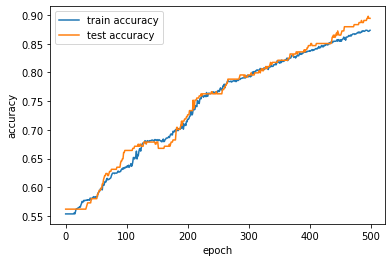

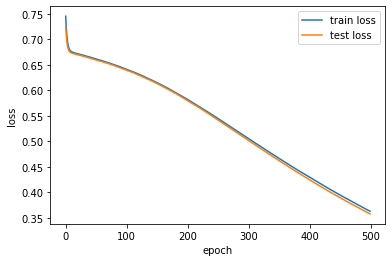


Loss, accuracy on test data: 
0.3575 89.42%


In [0]:
# This makes figures that show how the training and testing accuracy and loss
# evolved against the number of epochs for the current training run

import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(("train accuracy","test accuracy"))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(("train loss","test loss"))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

eval_results = model.evaluate(test_x, test_y, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], eval_results[1]*100))